Projeto Ciência de Dados - Previsão de Preços
Nosso desafio é conseguir prever o preço de barcos que vamos vender baseado nas características do barco, como: ano, tamanho, tipo de barco, se é novo ou usado, qual material usado, etc.

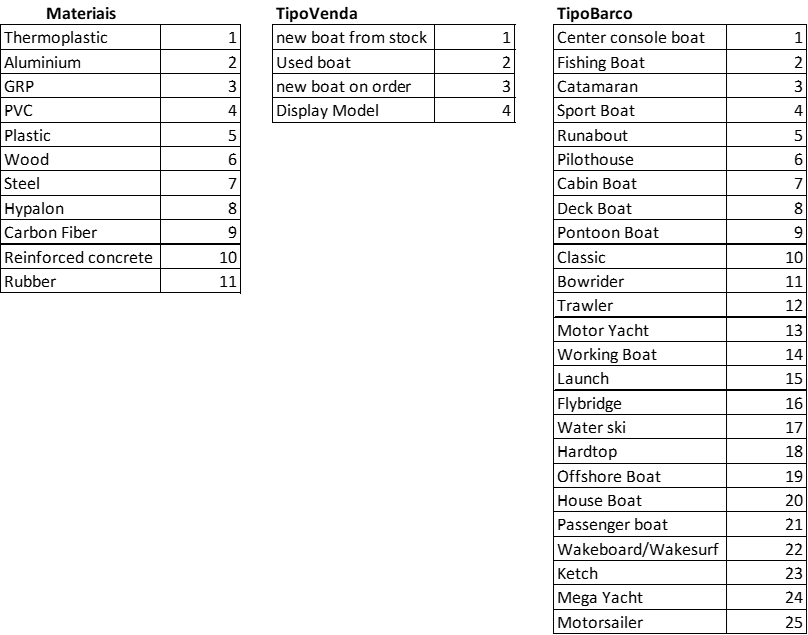

In [1]:
# Passo 1: Entendimento do Desafio
# Passo 2: Entendimento da Área/Empresa
# Entender o desafio e a área que esta relacionada ao desafio, pois o percentual de acertividade pode ser aceitável para uma área e não para outra

# Passo 3: Extração/Obtenção de Dados
import pandas as pd

tabela = pd.read_csv("barcos_ref.csv") # importação da base de dados que esta em arquivo
display(tabela)

,Preco,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,3490,1,1,2020,4.00,1.50,1
1,3399,2,1,2019,3.55,1.46,2
2,3600,3,2,1999,6.20,2.38,2
3,3500,2,2,1987,4.35,1.75,3
4,3500,4,2,2004,4.70,2.00,3
...,...,...,...,...,...,...,...
7644,5000,7,2,1974,7.20,2.70,3
7645,4999,4,2,1980,6.00,2.10,3
7646,4950,2,2,1984,6.00,1.62,5
7647,4499,4,1,2020,4.40,1.80,3


In [2]:
# Passo 4: Ajuste de Dados (Tratamento/Limpeza)
# Nesse arquivo de exemplo não será necessário realizar essa etapa. Aula 2 tem demonstração de limpeza

,Preco
Preco,1.000000
TipoBarco,0.293137
TipoVenda,0.041266
Ano,0.113385
Comprimento,0.578353
Largura,0.557621
Material,-0.036476


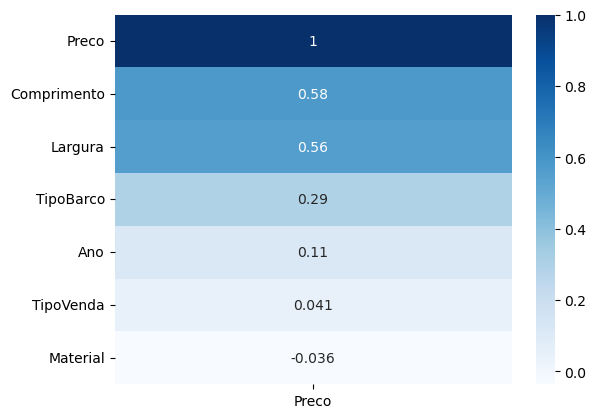

In [3]:
# Passo 5: Análise Exploratória - utilizando a correlação

# display(tabela.corr())  -> comando para realizar a correlação de todas as colunas 

display(tabela.corr()[["Preco"]]) # Correlação apenas com a coluna especificada 

# o número em sí não diz nada o que é relevante é: quanto mais perto de 1 (influencia muito) e o mais distante de 1 (não influencia)

# Códigos abaixo para mostrar o resultado da correlação em gráfico
import seaborn as sns
import matplotlib.pyplot as plt

# cria o gráfico
correlacao = tabela.corr()[["Preco"]]
correlacao = correlacao.sort_values(["Preco"], ascending=False)
sns.heatmap(correlacao, cmap="Blues", annot=True)

# sns.heatmap(tabela.corr()[["Preco"]], cmap="Blues",annot=True, sort) -> se não for fazer a ordenação basta usar somente esse código

# exibe o gráfico
plt.show()


In [4]:
# Passo 6: Modelagem + Algoritmos (Aqui que entra a Inteligência Artificial, se necessário)
# Preparação

# Separar a base em dados de X e Y -  onde Y é o que quero prever nesse exemplo o preço e X são os demais campos (as caracteristicas que devem ser utilizadas para prever o preço)
y = tabela["Preco"]
x = tabela.drop("Preco", axis=1) # demais colunas exceto o preço na aula 2 tem os detalhes

# O treino da IA não pode acontecer em toda a base de dados, pq senão não saberemos se ela aprendeu ou se apenas "decorou" a resposta
# separando os dados de treino e de teste
from sklearn.model_selection import train_test_split # essa biblioteca fará a divisão dos dados em x_treino, x_teste, y_treino, y_teste (nesta ordem)

x_treino, x_teste, y_treino, y_teste = train_test_split(x,y, test_size=0.3, random_state=1) # test_size é para definir o percentual dos dados que serão usados para teste, normalmente é 30% recomenta ente 20% e 40% no máximo


In [5]:
# Criação e Treino da IA

# importar a inteligência artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligência artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a inteligência artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)


RandomForestRegressor()

In [6]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.4490324760735813
0.8555681810733985


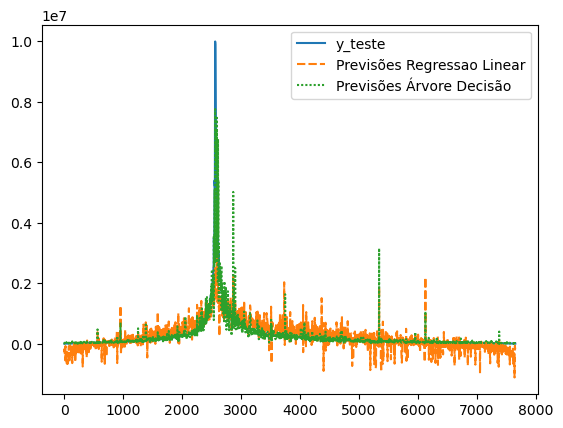

In [7]:
# Passo 7: Interpretação de Resultados
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar["Previsões Regressao Linear"] = previsao_regressaolinear
tabela_auxiliar["Previsões Árvore Decisão"] = previsao_arvoredecisao

sns.lineplot(data=tabela_auxiliar)
plt.show()

In [8]:
# Criar uma nova previsão a partir novos dados
tabela_nova = pd.read_csv("novos_barcos.csv")
display(tabela_nova)
previsao = modelo_arvoredecisao.predict(tabela_nova)
print(previsao)

,TipoBarco,TipoVenda,Ano,Comprimento,Largura,Material
0,2,3,2023,3.0,1.5,1
1,2,1,2023,3.8,1.9,2
2,3,2,1999,6.2,3.0,2


[ 6242.796  9104.79  18984.7  ]
